In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

The subject of the Challenge was to study the H to tau tau channel.

The expected signal has a broad distribution
which is masked by much more abundant backgrounds, in particular the Z to tau tau decay which produces a very large peak at a slightly lower mass.

From the machine learning point of view the problem can be formally cast into a binary classification problem. Events generated in the collider are preprocessed and represented as a feature vector. The problem is to classify events as signal (that is, an event of interest, in our case a H to tau tau decay) or background (an event produced by already known processes).

The channel of Higgs decaying into two taus is experimentally challenging for essentially two reasons. First, since neutrinos are not measured in the detector, their presence in the final state makes it difficult to evaluate the mass of the Higgs candidate on an event-by-event basis. Second, the Z boson can also decay into two taus, and one expects far more tau pairs from events of this type than from Higgs decays. Since the mass of a Z (91 GeV) is not very far (within about one standard deviation of the resolution of the mass measurement) from the mass of the Higgs (125 GeV), the two decays produce similar events which are difficult to separate.

Data set source: http://opendata.cern.ch/record/328 (Here they also explain the meaning of each feature)

Original challenge post: https://www.kaggle.com/c/higgs-boson/overview

Complete analysis of the Challenge and results: http://proceedings.mlr.press/v42/cowa14.pdf


References:

a) https://github.com/NiccoloSacchi/ml-boson/blob/master/project_solution.ipynb

b) https://github.com/xiangzhemeng/Kaggle-Higgs-Boson-Machine-Learning-Challenge/blob/master/ML_Project1_Analysis_Notebook.ipynb

c) https://nycdatascience.com/blog/student-works/kaggle-higgs-boson-machine-learning-challenge/

d) https://nycdatascience.com/blog/student-works/top2p-higgs-boson-machine-learning/

e) https://chameerawijebandara.files.wordpress.com/2014/09/higgsbosonreport.pdf

In [2]:
# Reading data
data = pd.read_csv('DataFiles/atlas-higgs-challenge-2014-v2.csv')

print(data.shape)


(818238, 35)


For the Challenge, we provide simulated events using the official ATLAS full detector sim- ulator. The simulator yields simulated events with properties that mimic the statistical properties of the real events of the signal type as well as several important backgrounds.

For the sake of simplicity, only three background processes were retained for the Challenge. The first comes from the decay of the Z boson (with mass 91.2GeV) in two taus.

The second set contains events with a pair of top quarks, which can have lepton and hadronic tau among their decay products.

The third set involves the decay of the W boson, where one electron or muon and a hadronic tau can appear simultaneously only through imperfections of the particle identification procedure.


In [3]:
data.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label,KaggleSet,KaggleWeight
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2.150,0.444,46.062,1.24,-2.475,113.497,0.000814,s,t,0.002653
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,0.725,1.158,-999.000,-999.00,-999.000,46.226,0.681042,b,t,2.233584
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,2.053,-2.028,-999.000,-999.00,-999.000,44.251,0.715742,b,t,2.347389
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,1.660654,b,t,5.446378
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,1.904263,b,t,6.245333


KaggleSet column: String specifying to which Kaggle set the event belongs : ”t”:training, ”b”:public leaderboard, ”v”:private leaderboard,”u”:unused.

Label coulm: The event label (string) yi ∈ {s,b} (s for signal, b for background).

In [4]:
train = data[data['KaggleSet'] == 't' ]
train.shape

(250000, 35)

In [5]:
test = training = data[data['KaggleSet'] == 'b' ]
test.shape

(100000, 35)

In [6]:
data_merged = pd.concat((train,test))
data_merged.shape

(350000, 35)

In [7]:
# Check for missing values
print(data_merged.isnull().sum())

# There are no missing values.

EventId                        0
DER_mass_MMC                   0
DER_mass_transverse_met_lep    0
DER_mass_vis                   0
DER_pt_h                       0
DER_deltaeta_jet_jet           0
DER_mass_jet_jet               0
DER_prodeta_jet_jet            0
DER_deltar_tau_lep             0
DER_pt_tot                     0
DER_sum_pt                     0
DER_pt_ratio_lep_tau           0
DER_met_phi_centrality         0
DER_lep_eta_centrality         0
PRI_tau_pt                     0
PRI_tau_eta                    0
PRI_tau_phi                    0
PRI_lep_pt                     0
PRI_lep_eta                    0
PRI_lep_phi                    0
PRI_met                        0
PRI_met_phi                    0
PRI_met_sumet                  0
PRI_jet_num                    0
PRI_jet_leading_pt             0
PRI_jet_leading_eta            0
PRI_jet_leading_phi            0
PRI_jet_subleading_pt          0
PRI_jet_subleading_eta         0
PRI_jet_subleading_phi         0
PRI_jet_al

Let's look now at the background signal ratio of the data.

In the real data, the classes are very imbalanced (approximately two signal events in a thousand events after preselection); for this reason the simulated data provided in the Challenge are enriched in signal events.

b    164333
s     85667
Name: Label, dtype: int64


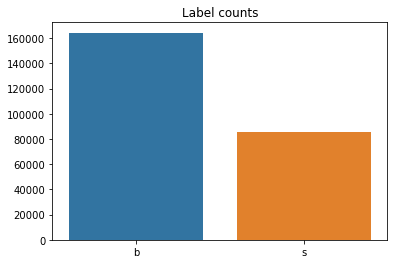

In [8]:
print(train['Label'].value_counts())


sns.barplot(x = train['Label'].value_counts().index, y = train['Label'].value_counts().values)
plt.title('Label counts')
plt.show()

b    65975
s    34025
Name: Label, dtype: int64


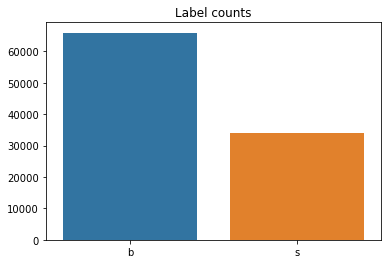

In [9]:
print(test['Label'].value_counts())


sns.barplot(x = test['Label'].value_counts().index, y = test['Label'].value_counts().values)
plt.title('Label counts')
plt.show()

b    230308
s    119692
Name: Label, dtype: int64


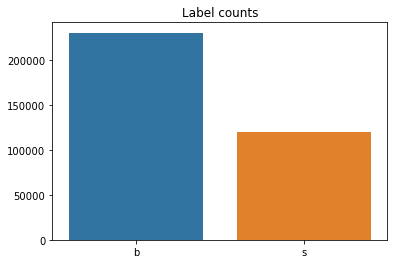

In [10]:
print(data_merged['Label'].value_counts())


sns.barplot(x = data_merged['Label'].value_counts().index, y = data_merged['Label'].value_counts().values)
plt.title('Label counts')

plt.show()

The ATLAS detector measures three properties of these surviving particles (the so-called final state): the type of the particle (electron, photon, muon, etc.), its energy, and the 3D direction of the particle. From these quantities, the properties of the decayed parent particle is inferred, and the inference chain is continued until reaching the heaviest primary particles.

Variables are indicated as “may be undefined” when it can happen that they are meaningless or cannot be computed; in this case, their value is −999.0, which is outside the normal range of all variables. 

The missing values do not result from flaws in the simulation process, that would be the equivalent of unobserved measurements, but are structurally absent. For instance, in events where there is no jet (PRI jet num = 0), there is no such a thing as a “leading jet”, thus the associated primitive quantities (PRI jet leading pt, PRI jet leading eta, PRI jet leading eta) are structurally undefined, and the features derived from these as well. Such data intrinsically live in a lower dimensional subspace of the feature space, determined by its own actual features. All missing features are related to PRI jet num, except DER mass MMC.


In [11]:
# Check which columns have missing data
for cols in train:
    test_missing = (data_merged[cols] == -999.000)
    print('Column {} has {} missing data'.format(cols,test_missing.sum()))

Column EventId has 0 missing data
Column DER_mass_MMC has 53189 missing data
Column DER_mass_transverse_met_lep has 0 missing data
Column DER_mass_vis has 0 missing data
Column DER_pt_h has 0 missing data
Column DER_deltaeta_jet_jet has 248411 missing data
Column DER_mass_jet_jet has 248411 missing data
Column DER_prodeta_jet_jet has 248411 missing data
Column DER_deltar_tau_lep has 0 missing data
Column DER_pt_tot has 0 missing data
Column DER_sum_pt has 0 missing data
Column DER_pt_ratio_lep_tau has 0 missing data
Column DER_met_phi_centrality has 0 missing data
Column DER_lep_eta_centrality has 248411 missing data
Column PRI_tau_pt has 0 missing data
Column PRI_tau_eta has 0 missing data
Column PRI_tau_phi has 0 missing data
Column PRI_lep_pt has 0 missing data
Column PRI_lep_eta has 0 missing data
Column PRI_lep_phi has 0 missing data
Column PRI_met has 0 missing data
Column PRI_met_phi has 0 missing data
Column PRI_met_sumet has 0 missing data
Column PRI_jet_num has 0 missing data

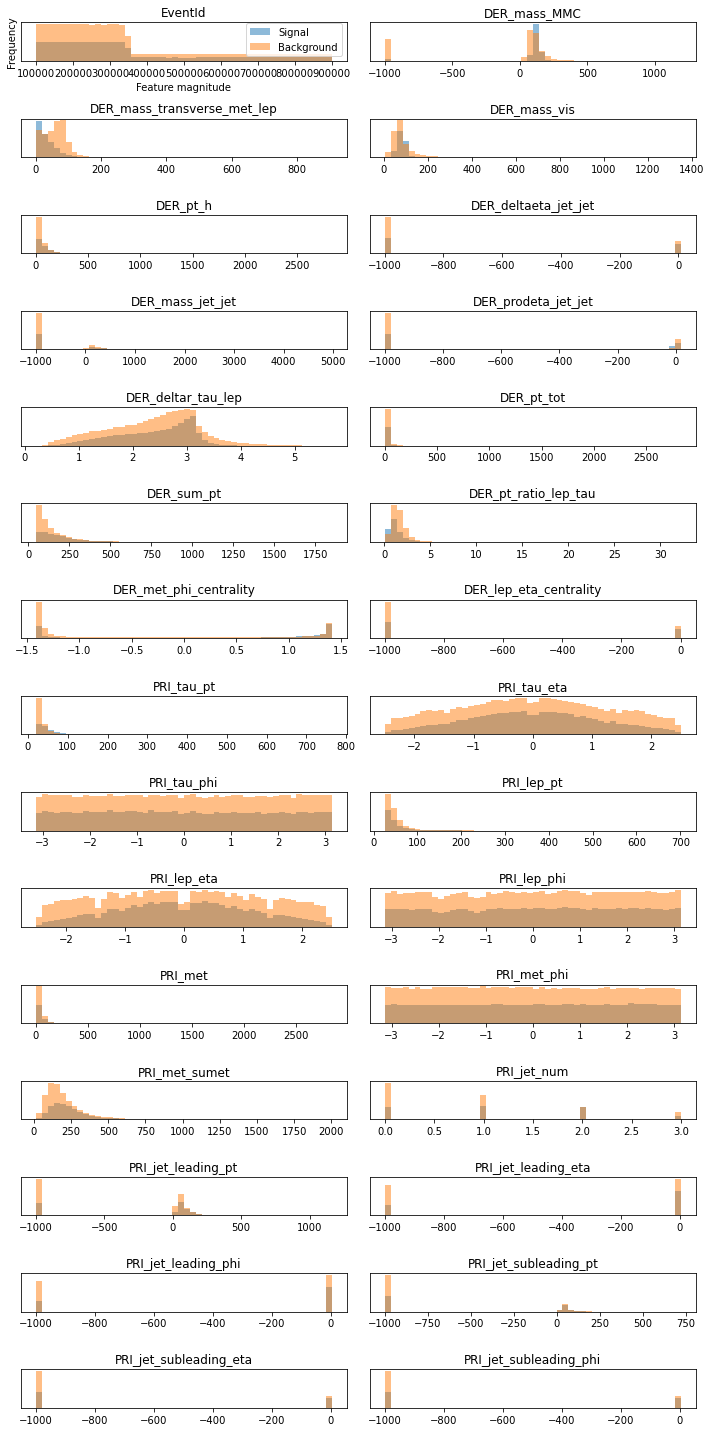

In [12]:
fig, axes = plt.subplots(15,2,figsize=(10,20))
signal = data_merged[data_merged['Label'] == 's']
background = data_merged[data_merged['Label'] == 'b']
ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(data_merged.iloc[:,i], bins =50)
    ax[i].hist(signal.iloc[:,i], bins = bins, alpha = 0.5)
    ax[i].hist(background.iloc[:,i], bins = bins, alpha = 0.5)
    ax[i].set_title(data_merged.columns[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["Signal", "Background"], loc ="best")
fig.tight_layout()
plt.show()

The Phi variables showed uniform densities for both the signal and background, indicating that these features are not useful in distinguishing the true signals from the background noise. We can drop these variables without any loss of fidelity against the signal and background information from the original data set.


After checking out all the columns which have missing data, we started to compare these columns in terms of the number of jets. We found out that there are some internal rules between the number of jets and several missing data; Thus, we decided to split the set into individual sets for each jet number [PRI_jet_num].

Jets are pseudo particles rather than real particles; they originate from a high energy quark or gluon, and they appear in the detector as a collimated energy deposit associated with charged tracks

NOTE: The invariant mass (DER_mass_MMC) feature is estimated. The estimated mass mH of the Higgs boson candidate, obtained through a probabilistic phase space integration (may be undefined if the topology of the event is too far from the expected topology)

In our case, the final state is a lepton, a hadronic tau, and three neutrinos. The lepton and hadronic tau are measured in the detector, but for the neutrinos, all we have is the transverse missing energy, which is an estimation of the sum of the momenta of the three neutrinos in the transverse plane. Hence the mass of the $\tau\tau$ can not be measured; we have to resort to different estimators which are only correlated to the mass of the $\tau\tau$. For example, the visible mass which is the invariant mass of the lepton and the hadronic tau, hence deliberately ignoring the unmeasured neutrinos.




So, let's divide the data depending on the jet number that is a categorical number in {0, 1, 2, 3}


In [13]:
all_data = data_merged.copy(deep=True)


jets_0 = all_data[all_data['PRI_jet_num']==0]
jets_1 = all_data[all_data['PRI_jet_num']==1]
jets_2 = all_data[all_data['PRI_jet_num']==2]
jets_3 = all_data[all_data['PRI_jet_num']==3]

jets_0.shape, jets_1.shape, jets_2.shape, jets_3.shape

((140076, 35), (108335, 35), (70645, 35), (30944, 35))

In [14]:
(jets_0.values == -999.000).sum(), (jets_1.values == -999.000).sum(), (jets_2.values == -999.000).sum(), (jets_3.values == -999.000).sum()

(1437191, 768928, 4095, 2080)

In [15]:
#30 are the features that are physically relevant

jets_0entries=30*len(jets_0)
jets_1entries=30*len(jets_1)
jets_2entries=30*len(jets_2)
jets_3entries=30*len(jets_3)
all_dataentries=30*len(all_data)

#percentage of entries that are unphysical

print('jet 0:',((jets_0.values == -999.000).sum()/jets_0entries)*100,"%")
print('jet 1:',((jets_1.values == -999.000).sum()/jets_1entries)*100,"%")
print('jet 2:',((jets_2.values == -999.000).sum()/jets_2entries)*100,"%")
print('jet 3:',((jets_3.values == -999.000).sum()/jets_3entries)*100,"%")
print('Total data:',((all_data.values == -999.000).sum()/all_dataentries)*100,"%")

jet 0: 34.20026747384753 %
jet 1: 23.65895909293703 %
jet 2: 0.19321961922287495 %
jet 3: 0.22406066873491898 %
Total data: 21.069466666666667 %


In [16]:
print("\n")
print("Features in the dataset that have a -999 value")
print("\n")
for col in range(31):
    print("{:<30s}{:>4d}".format(all_data.columns[col],np.sum(all_data.iloc[:, col] == -999)))



Features in the dataset that have a -999 value


EventId                          0
DER_mass_MMC                  53189
DER_mass_transverse_met_lep      0
DER_mass_vis                     0
DER_pt_h                         0
DER_deltaeta_jet_jet          248411
DER_mass_jet_jet              248411
DER_prodeta_jet_jet           248411
DER_deltar_tau_lep               0
DER_pt_tot                       0
DER_sum_pt                       0
DER_pt_ratio_lep_tau             0
DER_met_phi_centrality           0
DER_lep_eta_centrality        248411
PRI_tau_pt                       0
PRI_tau_eta                      0
PRI_tau_phi                      0
PRI_lep_pt                       0
PRI_lep_eta                      0
PRI_lep_phi                      0
PRI_met                          0
PRI_met_phi                      0
PRI_met_sumet                    0
PRI_jet_num                      0
PRI_jet_leading_pt            140076
PRI_jet_leading_eta           140076
PRI_jet_leading_phi       

In [17]:
for jet, cur_set in enumerate([jets_0, jets_1, jets_2, jets_3]):
    print("\n")
    print("Features in the dataset with jet=", jet, "that have a -999 value")
    print("\n")
    for col in range(31):
        print("{:<30s}{:>4d}".format(all_data.columns[col],np.sum(cur_set.iloc[:, col] == -999)))



Features in the dataset with jet= 0 that have a -999 value


EventId                          0
DER_mass_MMC                  36431
DER_mass_transverse_met_lep      0
DER_mass_vis                     0
DER_pt_h                         0
DER_deltaeta_jet_jet          140076
DER_mass_jet_jet              140076
DER_prodeta_jet_jet           140076
DER_deltar_tau_lep               0
DER_pt_tot                       0
DER_sum_pt                       0
DER_pt_ratio_lep_tau             0
DER_met_phi_centrality           0
DER_lep_eta_centrality        140076
PRI_tau_pt                       0
PRI_tau_eta                      0
PRI_tau_phi                      0
PRI_lep_pt                       0
PRI_lep_eta                      0
PRI_lep_phi                      0
PRI_met                          0
PRI_met_phi                      0
PRI_met_sumet                    0
PRI_jet_num                      0
PRI_jet_leading_pt            140076
PRI_jet_leading_eta           140076
PRI_jet_leadin

Notice that some columns are composed entirely by -999 values, so we have to drop them

In [18]:
for jet, cur_set  in enumerate([jets_0, jets_1, jets_2, jets_3]):
    print("\n")
    print("Features in the dataset with jet=", jet, "that ONLY have -999 values")
    print("\n")
    print(cur_set.shape)
    delete=[]
    for col in range(31):
         if np.sum(cur_set.iloc[:, col] == -999)==len(cur_set): #if the entire column is composed of -999 values we drop it
            delete.append(cur_set.columns[col]) #save the column names
            print(cur_set.columns[col])
    cur_set.drop(columns=delete, inplace= True) #drop the columns in the current dataframe
    print(cur_set.shape)



Features in the dataset with jet= 0 that ONLY have -999 values


(140076, 35)
DER_deltaeta_jet_jet
DER_mass_jet_jet
DER_prodeta_jet_jet
DER_lep_eta_centrality
PRI_jet_leading_pt
PRI_jet_leading_eta
PRI_jet_leading_phi
PRI_jet_subleading_pt
PRI_jet_subleading_eta
PRI_jet_subleading_phi
(140076, 25)


Features in the dataset with jet= 1 that ONLY have -999 values


(108335, 35)
DER_deltaeta_jet_jet
DER_mass_jet_jet
DER_prodeta_jet_jet
DER_lep_eta_centrality
PRI_jet_subleading_pt
PRI_jet_subleading_eta
PRI_jet_subleading_phi
(108335, 28)


Features in the dataset with jet= 2 that ONLY have -999 values


(70645, 35)
(70645, 35)


Features in the dataset with jet= 3 that ONLY have -999 values


(30944, 35)
(30944, 35)


/Users/hal9000/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/hal9000/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/hal9000/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Use

In [19]:
jets_0.shape, jets_1.shape, jets_2.shape, jets_3.shape

((140076, 25), (108335, 28), (70645, 35), (30944, 35))

For data pre-processing we have two options:

a) to replace -999 by the most frequent value of the column if there exists at least one non -999 value in the column. Otherwise, by 0 which means we discarded this feature.

b) (most recomended) substitute them with 0s after standardization, where during standardization we ignored those invalid values so that they didn't affect mean and standard deviation.

Let's start with a)

In [20]:
def replace_999(data):
    for col in range(1,31): #we skip the EventId and ignore the last 4 columns
        if np.any(data.iloc[:, col] == -999):

            # Collect all the indices of non -999 value
            non_indices = data[data.iloc[:, col]!= -999].index.tolist()
            
            # Collect also the boolean indices
            bool_indices = data.iloc[:, col]!= -999

            # Calculate frequency
            values, counts = np.unique(data.iloc[non_indices,col], return_counts = True)

            # Replace -999 by the most frequent value of the columns if there exits at least one non -999 value
            if (len(values) > 1):
                data.iloc[~bool_indices, col] = values[np.argmax(counts)]
                
            # Otherwise, discard the column
            else:
                data.iloc[:,col] = 0
    return data

Let's test our function

In [21]:
prueba = data_merged.copy()
prueba.iloc[:,:]=-999
prueba.iloc[1,:]=2
prueba.iloc[2,:]=4
prueba.iloc[3,:]=4
prueba

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label,KaggleSet,KaggleWeight
0,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
2,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
3,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
4,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799961,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
799974,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
799987,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
799990,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [22]:
replace_999(prueba)

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label,KaggleSet,KaggleWeight
0,-999,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,-999,-999,-999,-999
1,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
2,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
3,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
4,-999,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,-999,-999,-999,-999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799961,-999,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,-999,-999,-999,-999
799974,-999,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,-999,-999,-999,-999
799987,-999,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,-999,-999,-999,-999
799990,-999,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,-999,-999,-999,-999


In [23]:
prueba2 = data_merged.copy()
prueba2.iloc[:,:]=-999
prueba2

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label,KaggleSet,KaggleWeight
0,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799961,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
799974,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
799987,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
799990,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [24]:
replace_999(prueba2)

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label,KaggleSet,KaggleWeight
0,-999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-999,-999,-999,-999
1,-999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-999,-999,-999,-999
2,-999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-999,-999,-999,-999
3,-999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-999,-999,-999,-999
4,-999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-999,-999,-999,-999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799961,-999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-999,-999,-999,-999
799974,-999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-999,-999,-999,-999
799987,-999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-999,-999,-999,-999
799990,-999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-999,-999,-999,-999


In [25]:
prueba3 = data.copy()
prueba3
print("\n")
print("Features in the dataset that have -999 value")
print("\n")
for col in range(31):
    print("{:<30s}{:>4d}".format(prueba3.columns[col],np.sum(prueba3.iloc[:, col] == -999)))



Features in the dataset that have -999 value


EventId                          0
DER_mass_MMC                  124602
DER_mass_transverse_met_lep      0
DER_mass_vis                     0
DER_pt_h                         0
DER_deltaeta_jet_jet          580253
DER_mass_jet_jet              580253
DER_prodeta_jet_jet           580253
DER_deltar_tau_lep               0
DER_pt_tot                       0
DER_sum_pt                       0
DER_pt_ratio_lep_tau             0
DER_met_phi_centrality           0
DER_lep_eta_centrality        580253
PRI_tau_pt                       0
PRI_tau_eta                      0
PRI_tau_phi                      0
PRI_lep_pt                       0
PRI_lep_eta                      0
PRI_lep_phi                      0
PRI_met                          0
PRI_met_phi                      0
PRI_met_sumet                    0
PRI_jet_num                      0
PRI_jet_leading_pt            327371
PRI_jet_leading_eta           327371
PRI_jet_leading_phi        

In [26]:
replace_999(prueba3)
print("\n")
print("Features in the dataset that have -999 value")
print("\n")
for col in range(31):
    print("{:<30s}{:>4d}".format(prueba3.columns[col],np.sum(prueba3.iloc[:, col] == -999)))
    
#Notice that after using the function, no -999 value appears.



Features in the dataset that have -999 value


EventId                          0
DER_mass_MMC                     0
DER_mass_transverse_met_lep      0
DER_mass_vis                     0
DER_pt_h                         0
DER_deltaeta_jet_jet             0
DER_mass_jet_jet                 0
DER_prodeta_jet_jet              0
DER_deltar_tau_lep               0
DER_pt_tot                       0
DER_sum_pt                       0
DER_pt_ratio_lep_tau             0
DER_met_phi_centrality           0
DER_lep_eta_centrality           0
PRI_tau_pt                       0
PRI_tau_eta                      0
PRI_tau_phi                      0
PRI_lep_pt                       0
PRI_lep_eta                      0
PRI_lep_phi                      0
PRI_met                          0
PRI_met_phi                      0
PRI_met_sumet                    0
PRI_jet_num                      0
PRI_jet_leading_pt               0
PRI_jet_leading_eta              0
PRI_jet_leading_phi              0
PRI_je

<AxesSubplot:>

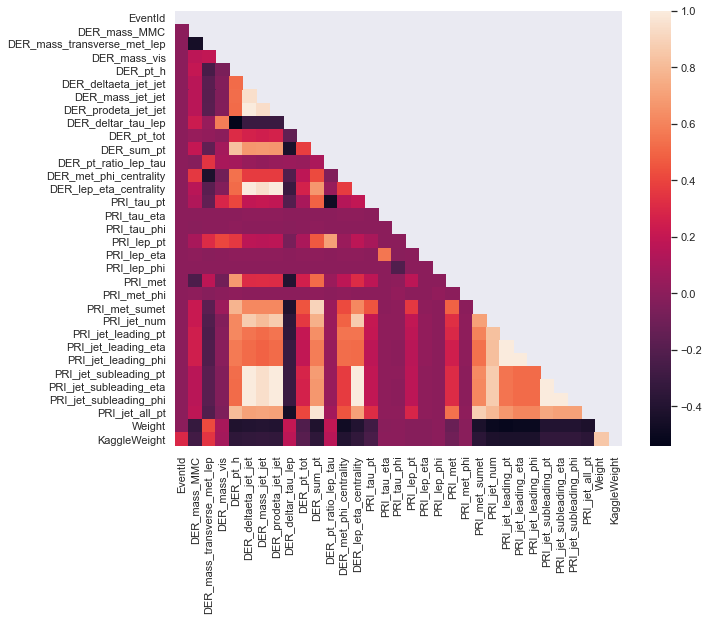

In [27]:
#making the matrix triangular
matrix = np.triu(data_merged.corr())

# set the size of the figure
sns.set(rc={'figure.figsize':(10,8)})

# compute the pair wise correlation for all columns  
correlation_matrix = data_merged.corr().round(2)

# use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=False,mask=matrix)